In [ ]:
# Obervations
# 1. Capomulin and Ramicane appeared to have more test subjects (close to 250), which could sway the data in there favor
# as they simply have more data to call upon than the other drugs.
# 2. With a correlation of .84, it seems fair to say there is a strong positive correlation betweena weight and tumor volume.
# 3. With a near 50/50 spilt of gender, it eases the notion that gender could over effect how the drug regimen affects tumor volume.  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mice_df= pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#  Checking the number of mice.
mice_count= len(mice_df["Mouse ID"].unique())
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mice_df[mice_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice_clean = mice_df.loc[mice_df["Mouse ID"]!="g989"]
duplicate_mice_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#  Checking the number of mice in the clean DataFrame.
new_mice_count = len(duplicate_mice_clean["Mouse ID"].unique())
new_mice_count


248

In [7]:
# Summary Statistics

In [8]:
#  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group = duplicate_mice_clean.groupby(["Drug Regimen"])

tumor_mean = group["Tumor Volume (mm3)"].mean()
tumor_mean
tumor_median = group["Tumor Volume (mm3)"].median()
tumor_median
tumor_variance = group["Tumor Volume (mm3)"].var()
tumor_variance
tumor_sd = group["Tumor Volume (mm3)"].std()
tumor_sd
tumor_sem = group["Tumor Volume (mm3)"].sem()
tumor_sem

tumor_summary = pd.concat([tumor_mean, tumor_median, tumor_variance, tumor_sd, tumor_sem],axis=1)
tumor_summary.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
tumor_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_2 = duplicate_mice_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
tumor_summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
# Bar and Pie Charts

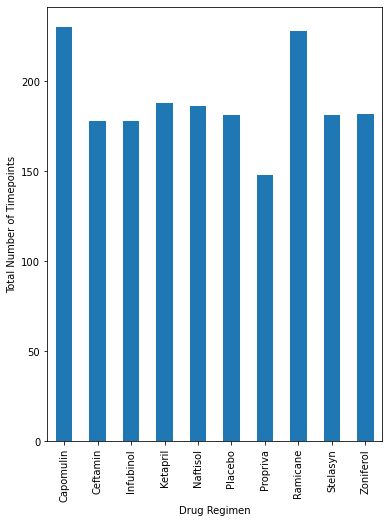

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_timepoint = duplicate_mice_clean.groupby("Drug Regimen")
pt = pandas_timepoint["Timepoint"].count()

pandas_bar = pt.plot(kind="bar", figsize=(6,8))

pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Total Number of Timepoints")

plt.show()
plt.tight_layout()


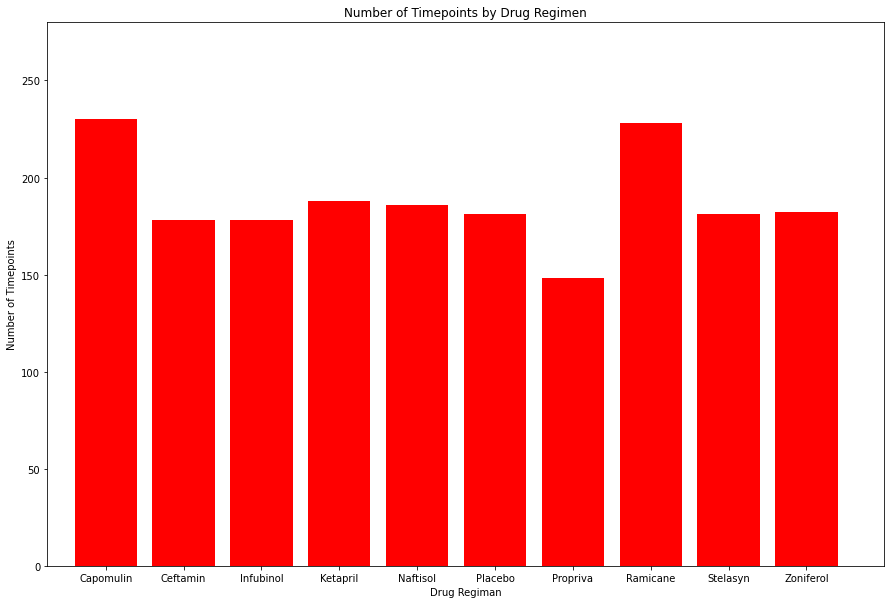

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(pandas_timepoint))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, pt, color="r", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(pt)+50)
plt.title("Number of Timepoints by Drug Regimen")
plt.xlabel("Drug Regiman")
plt.ylabel("Number of Timepoints")
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

fvm = duplicate_mice_clean.groupby(["Sex", "Mouse ID"])
fvm
female_vs_male = pd.DataFrame(fvm.size())

gender = pd.DataFrame(female_vs_male.groupby(["Sex"]).count())
gender.columns = ["Total"]

gender_distribution = (100*(gender["Total"]/gender["Total"].sum()))
gender["Distribtuion"] = gender_distribution
gender

,Total,Distribtuion
Sex,,
Female,123,49.596774
Male,125,50.403226


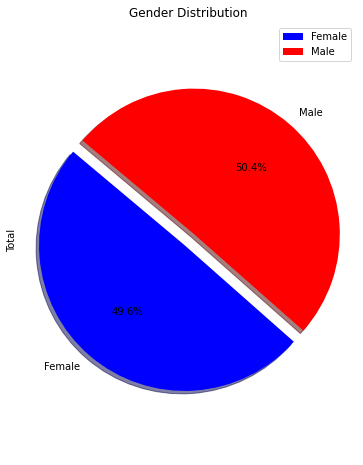

In [14]:
colors = ["blue", "red"]
explode = (0.1, 0)
plot = gender.plot(kind="pie", y="Total", title= "Gender Distribution", figsize=(6,8), colors= colors, explode= explode, shadow= True, autopct="%1.1f%%", startangle=140)

plt.axis("equal")
plt.show()

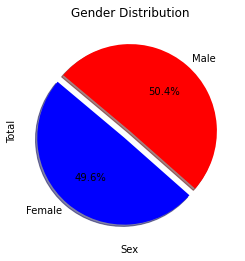

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
Sizes = [49.59, 50.40]
Colors = ["Red", "Blue"]
Explode = (0.1, 0)

plt.pie(Sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Total")
plt.show()

In [16]:
# Quartiles, Outliers, and Boxplots


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cap_df = duplicate_mice_clean.loc[duplicate_mice_clean["Drug Regimen"]=="Capomulin",:]
cap_last = cap_df.groupby("Mouse ID").max()["Timepoint"]
cap_last

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_tv = pd.DataFrame(cap_last)
cap_merge = pd.merge(cap_tv, duplicate_mice_clean, on=("Mouse ID", "Timepoint"), how="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumors = cap_merge["Tumor Volume (mm3)"]
cap_quar = cap_tumors.quantile([.25, .5, .75])
cap_lowerq = cap_quar[.25]
cap_upperq = cap_quar[.75]
cap_iqr = cap_upperq - cap_lowerq

print(f"The lower quartile of temperatures is: {cap_lowerq}")
print(f"The upper quartile of temperatures is: {cap_upperq}")
print(f"The interquartile range of temperatures is: {cap_iqr}")
print(f"The the median of temperatures is: {cap_quar[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
Ram_df = duplicate_mice_clean.loc[duplicate_mice_clean["Drug Regimen"]=="Ramicane",:]
Ram_last = Ram_df.groupby("Mouse ID").max()["Timepoint"]
Ram_last

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ram_tv = pd.DataFrame(Ram_last)
Ram_merge = pd.merge(Ram_tv, duplicate_mice_clean, on=("Mouse ID", "Timepoint"), how="left")


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ram_tumors = Ram_merge["Tumor Volume (mm3)"]
Ram_quar = Ram_tumors.quantile([.25, .5, .75])
Ram_lowerq = Ram_quar[.25]
Ram_upperq = Ram_quar[.75]
Ram_iqr = Ram_upperq - cap_lowerq

print(f"The lower quartile of temperatures is: {Ram_lowerq}")
print(f"The upper quartile of temperatures is: {Ram_upperq}")
print(f"The interquartile range of temperatures is: {Ram_iqr}")
print(f"The the median of temperatures is: {Ram_quar[0.5]} ")

Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)
print(f"Values below {Ram_lower_bound} could be outliers.")
print(f"Values above {Ram_upper_bound} could be outliers.")

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 8.281649430000002
The the median of temperatures is: 36.56165229 
Values below 19.137995404999998 could be outliers.
Values above 53.081480415 could be outliers.


In [21]:
# Start by getting the last (greatest) timepoint for each mouse
infu_df = duplicate_mice_clean.loc[duplicate_mice_clean["Drug Regimen"]=="Infubinol",:]
infu_last = infu_df.groupby("Mouse ID").max()["Timepoint"]
infu_last

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infu_tv = pd.DataFrame(infu_last)
infu_merge = pd.merge(infu_tv, duplicate_mice_clean, on=("Mouse ID", "Timepoint"), how="left")

In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infu_tumors = infu_merge["Tumor Volume (mm3)"]
infu_quar = infu_tumors.quantile([.25, .5, .75])
infu_lowerq = infu_quar[.25]
infu_upperq = infu_quar[.75]
infu_iqr = infu_upperq - infu_lowerq

print(f"The lower quartile of temperatures is: {infu_lowerq}")
print(f"The upper quartile of temperatures is: {infu_upperq}")
print(f"The interquartile range of temperatures is: {infu_iqr}")
print(f"The the median of temperatures is: {infu_quar[0.5]} ")

infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
print(f"Values below {infu_lower_bound} could be outliers.")
print(f"Values above {infu_upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [23]:
# Start by getting the last (greatest) timepoint for each mouse
ceft_df = duplicate_mice_clean.loc[duplicate_mice_clean["Drug Regimen"]=="Ceftamin",:]
ceft_last = ceft_df.groupby("Mouse ID").max()["Timepoint"]
ceft_last

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceft_tv = pd.DataFrame(ceft_last)
ceft_merge = pd.merge(ceft_tv, duplicate_mice_clean, on=("Mouse ID", "Timepoint"), how="left")

In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceft_tumors = ceft_merge["Tumor Volume (mm3)"]
ceft_quar = ceft_tumors.quantile([.25, .5, .75])
ceft_lowerq = ceft_quar[.25]
ceft_upperq = ceft_quar[.75]
ceft_iqr = ceft_upperq - ceft_lowerq

print(f"The lower quartile of temperatures is: {ceft_lowerq}")
print(f"The upper quartile of temperatures is: {ceft_upperq}")
print(f"The interquartile range of temperatures is: {ceft_iqr}")
print(f"The the median of temperatures is: {ceft_quar[0.5]} ")

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


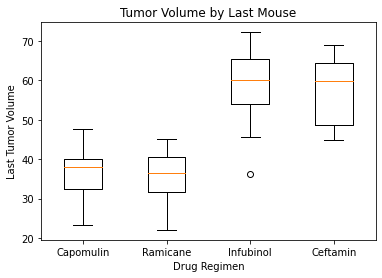

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [cap_tumors, Ram_tumors , infu_tumors, ceft_tumors]
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Last Mouse")
ax1.set_ylabel("Last Tumor Volume")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_data, labels=drug_regimen)
plt.show()

In [26]:
# Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_line = cap_df.loc[cap_df["Mouse ID"]=="b128",:]
cap_line.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


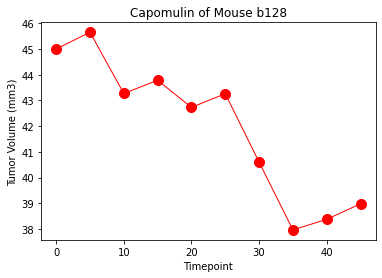

In [28]:
x_axis = cap_line["Timepoint"]
y_axis = cap_line["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin of Mouse b128")
plt.plot(x_axis, y_axis,linewidth=1, markersize=10,marker="o",color="red")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scatter = cap_df.groupby(["Mouse ID"]).mean()
cap_scatter.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


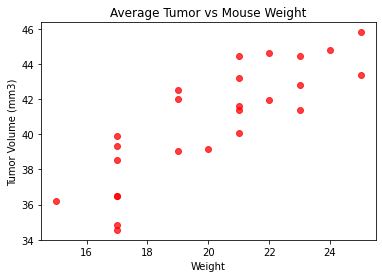

In [39]:
x_axis_scat = cap_scatter["Weight (g)"]
y_axis_scat = cap_scatter["Tumor Volume (mm3)"]

plt.scatter(x_axis_scat, y_axis_scat, marker = "o", facecolors="red", alpha=0.75)
plt.title("Average Tumor vs Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [31]:
# Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis_scat, y_axis_scat)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [34]:
x_values = x_axis_scat
y_values = y_axis_scat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'

The r-squared is: 0.7088568047708723


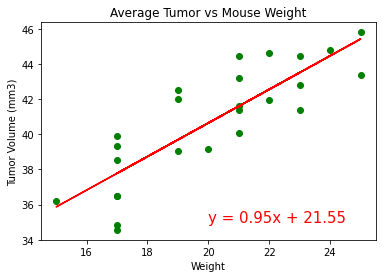

In [44]:
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title("Average Tumor vs Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()